In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statistics as st
from scipy import stats
from scipy.stats import norm

#### Buatlah sebuah file notebook (EDA_HouseMarket.ipynb) dan ikuti panduan Exploratory Data Analysis berikut:

1. Untuk feature/column Landsize, Distance, & Price, hitung dan beri penjelasan (insight) terkait:

    - Titik Pusat Data (Central Tendency)
    - Persebaran Data (Dispersion)
    - Distribusi Data (Distribution)
    
    
2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Landsize & Distance ! Tambahkan plot untuk menampilkan - adanya data outlier!


3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column Landsize & YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!


4. Tampilkan perkembangan rata-rata harga (price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!


5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

##### Some Key Details

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [2]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## 1. Untuk feature/column Landsize, Distance, & Price, hitung dan beri penjelasan (insight) terkait:

- Titik Pusat Data (Central Tendency)
- Persebaran Data (Dispersion)
- Distribusi Data (Distribution)

In [3]:
df_stats = df[['Landsize','Distance','Price']].describe().transpose()

In [4]:
df_stats['Range'] = df_stats['max'] - df_stats['min']
df_stats['IQR'] = df_stats['75%'] - df_stats['25%']
df_stats['Variance'] = df[['Landsize','Distance','Price']].var().tolist()

In [5]:
df_stats

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Variance
Landsize,13580.0,5.584161e+02,3990.669241,0.0,177.0,440.0,651.0,433014.0,433014.0,474.0,1.592544e+07
Distance,13580.0,1.013778e+01,5.868725,0.0,6.1,9.2,13.0,48.1,48.1,6.9,3.444193e+01
Price,13580.0,1.075684e+06,639310.724296,85000.0,650000.0,903000.0,1330000.0,9000000.0,8915000.0,680000.0,4.087182e+11


In [6]:
df_mode = df[['Landsize','Distance','Price']].mode()
df_mode

,Landsize,Distance,Price
0,0.0,11.2,1100000.0


In [7]:
df['Price'].var()

408718202199.89923

#### Describing Descriptive Statistics

<span style='color:Indianred'>**A. Central Tendency**</span>

- <span style='color:#0066b2'>Mean : merupakan nilai rata-rata setiap, jadi setiap seluruh values pada kolom / fetaures dijumlah kemudian dibagi total jumlah data</span>

- <span style='color:#0066b2'>Median : merupakan nilai tengah dari data, dengan cara di sortir dari yang terkecil sampai tertinggi dan mengambil nilai dengan posisi nilai berada di tengah-tengah (Posisi 50% dari data).</span>

- <span style='color:#0066b2'>Modus : merupakan values yang paling sering keluar (frekuensi terbanyak) dari semua values.</span>

#### From DataSet per Features

<span style='color:Indianred'>**1. Landsize - [Features / Columns]**</span>

- <span style='color:#0066b2'>**Mean : 558.4161266568483**</span>

Ini mempunyai arti, bahwa nilai 558.4161266568483 merupakan nilai rata-rata dari kolom Landsize yang jumlah datanya 13580 data

Sehingga bahwa rata-rata ukuran/luas/*landsize* rumah pada Kota Melbourne berkisar nilai tersebut

- <span style='color:#0066b2'>**Median : 440.0**</span>

Ini mempunyai arti bahwa nilai 440.0 berada pada titik tengah (Posisi 50 % dari data) sebaran data yang berjumlah 156 data

- <span style='color:#0066b2'>**Modus : 0**</span>

Ini mempunyai arti bahwa nilai 0 merupakan nilai dengan frekuensi terbanyak. Kemungkinan ini terjadi karena data tersebut memiliki nilai null/*NaN* dengan frekuensi yang banyak

- <span style='color:Indianred'>**Distance in KM to CBD [Features / Columns]**</span>

<span style='color:#0066b2'>**Mean : 10.13777614138439**</span>

Ini mempunyai arti, bahwa nilai 10.13777614138439 merupakan nilai rata-rata dari kolom Distance yang jumlah datanya 13580 data

Sehingga bahwa rata-rata *Distance*/Jarak rumah pada Kota Melbourne dengan ***CBD(Central Busniness District)*** bernilai 10.1377 kilometer

<span style='color:#0066b2'>**Median : 9.2**</span>

Ini mempunyai arti bahwa nilai 9.2 Km berada pada titik tengah (Posisi 50 % dari data) sebaran data yang berjumlah 156 data

<span style='color:#0066b2'>**Modus : 11.2**</span>

Ini mempunyai arti nilai 11.2 Km merupakan nilai dengan frekuensi/kemunculan angka tersebut banyak terhadap jarak dari ***CBD(Central Busniness District)***

- <span style='color:Indianred'>**Price in Australian Dollars- [Features / Columns]**</span>

<span style='color:#0066b2'>**Mean : 1075684.079455081**</span>

Ini mempunyai arti, bahwa nilai 1075684.079455081 merupakan nilai rata-rata dari kolom Distance yang jumlah datanya 13580 data

Sehingga bahwa rata-rata Harga rumah pada Kota Melbourne bernilai 1075684.079455081 *in Australian Dollar*

<span style='color:#0066b2'>**Median : 903000**</span>

Ini mempunyai arti bahwa nilai 903000 Dolar AUS berada pada titik tengah (Posisi 50 % dari data) sebaran data yang berjumlah 156 data

<span style='color:#0066b2'>**Modus : 1100000**</span>

Ini mempunyai arti nilai 1100000 Dolar merupakan nilai dengan frekuensi/kemunculan angka tersebut banyak pada sample yang ada.

<span style='color:Indianred'>**B. Dispersion**</span>

<span style='color:DarkOrange'>**Range, Q1, Q3, & IQR**</span>


- <span style='color:#0066b2'>Range : Selisih antara data dengan nilai yang terbesar dengan data denga nilai yang terkecil </span>


- <span style='color:#0066b2'>Q1 : Merupakan nilai tengah dari 25% jumlah data, dimana nilai tersebut dibawah nilai Median (50%)</span>


- <span style='color:#0066b2'>Q3 : Merupakan nilai tengah dari 75% jumlah data, dimana nilai tersebut diatas nilai Median (50%)</span>


- <span style='color:#0066b2'>IQR : Merupakan jumlah nilai dimana 50% dari jumlah data</span>

<span style='color:DarkOrange'>**Standard Deviasi & Variance**</span>

- <span style='color:#0066b2'>Standard Deviasi : Merupakan seberapa besar nilai sebaran pada data. Nilai tersebut mengukur berapa jauh nilai mean dari dataset. Biasanya standar deviasi dimanfaatkan untuk mengetahui apakah sampel data yang diambil mewakili seluruh populasi. Hal ini menunjukkan berapa banyak, rata-rata, masing-masing nilai dalam distribusi menyimpang dari mean, atau pusat, distribusi</span>

- <span style='color:#0066b2'>Variance : Nilai Keragaman dari suatu data</span>

#### From DataSet per Features

<span style='color:Indianred'>**1. Landsize - [Features / Columns]**</span>

<span style='color:#0066b2'>**Standard Deviasi : 3990.669241**</span>

Nilai tersebut mengukur berapa jauh nilai mean dari dataset. Hal ini menunjukkan berapa banyak, rata-rata, masing-masing nilai dalam distribusi menyimpang dari mean, atau pusat, distribusi

<span style='color:#0066b2'>**Variance : 15925440.991933735**</span>

Nilai tersebut seberapa besar tingkat variatif nilai/values datanya

<span style='color:#0066b2'>**Range : 433014.0**</span>

Nilai tersebut menunjukan, jarak/range nilai terbesar dengan nilai terkecil. Berada Pada 433014 meter

<span style='color:#0066b2'>**Interquarile Range (IQR): 474.0**</span>

Menunjukan nilai dimana 50% jumlah dari data.

<span style='color:Indianred'>**2. Distance - [Features / Columns]**</span>

<span style='color:#0066b2'>**Standard Deviasi : 5.868725**</span>

Nilai tersebut mengukur berapa jauh nilai mean dari dataset. Hal ini menunjukkan berapa banyak, rata-rata, masing-masing nilai dalam distribusi menyimpang dari mean, atau pusat, distribusi

<span style='color:#0066b2'>**Variance : 34.4419**</span>

Nilai tersebut seberapa besar tingkat variatif nilai/values datanya

<span style='color:#0066b2'>**Range : 48.1**</span>

Nilai tersebut menunjukan, jarak/range nilai terbesar dengan nilai terkecil. Berada Pada 433014 meter

<span style='color:#0066b2'>**Interquarile Range (IQR): 6.9**</span>

Menunjukan nilai dimana 50% jumlah dari data.

<span style='color:Indianred'>**3. Price - [Features / Columns]**</span>

<span style='color:#0066b2'>**Standard Deviasi : 639310.724296 Dolar**</span>

Nilai tersebut mengukur berapa jauh nilai mean dari dataset. Hal ini menunjukkan berapa banyak, rata-rata, masing-masing nilai dalam distribusi menyimpang dari mean, atau pusat, distribusi.

<span style='color:#0066b2'>**Variance : 34.4419**</span>

Nilai tersebut seberapa besar tingkat variatif nilai/values datanya

<span style='color:#0066b2'>**Range : 8915000**</span>

Nilai tersebut menunjukan, jarak/range nilai terbesar dengan nilai terkecil. Berada Pada 433014 meter

<span style='color:#0066b2'>**Interquarile Range (IQR): 680000**</span>

Menunjukan nilai dimana 50% jumlah dari data.

<span style='color:Indianred'>**C. Distribusi Data**</span>

<span style='color:DarkOrange'>**1. Skewness Test**</span>

- If skewness is less than -1 or greater than 1, the distribution is highly skewed.

- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [8]:
teststat, p = stats.skewtest(df['Landsize'])
teststat

212.046122018087

In [9]:
features = ['Landsize', 'Distance', 'Price']

for i in features:
    teststat, p = stats.skewtest(df[i])
    if -0.5 < teststat < 0.5:
        print(f'The Distribution of {i} is Approximately Symmetric')
    elif -1 < teststat < -0.5 or 0.5 > teststat > 1:
        print(f'The Distribution of {i} is Moderately Skewed.')
    elif teststat < -1 or teststat > 1:
        print(f'The Distribution of {i} is Highly Skewed.')

The Distribution of Landsize is Highly Skewed.
The Distribution of Distance is Highly Skewed.
The Distribution of Price is Highly Skewed.


<span style='color:DarkOrange'>**2. Kurtosis Test**</span>

In [10]:
features = ['Landsize', 'Distance', 'Price']

for i in features:
    teststat, p = stats.kurtosistest(df[i])
    if teststat > 3:
        print(f'The Distribution of {i} is Leptokurtik/Diatas Kurva Normal')
    elif teststat < 3:
        print(f'The Distribution of {i} is Platikurtik/Dibawah Kurva Normal.')
    elif teststat == 3:
        print(f'The Distribution of {i} is Mesokurtik/Kurva Normal.')

The Distribution of Landsize is Leptokurtik/Diatas Kurva Normal
The Distribution of Distance is Leptokurtik/Diatas Kurva Normal
The Distribution of Price is Leptokurtik/Diatas Kurva Normal


<span style='color:DarkOrange'>**3. Normal Test**</span>

In [11]:
# Menggunakan Normal Test
alpha = 0.001

features = ['Landsize', 'Distance', 'Price']

for i in ['Landsize', 'Distance', 'Price']:
    teststat1, p = stats.normaltest(df[i])
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f'Kolom {i} Tidak Terdistribusi Normal')
    else:
        print(f'Kolom {i} Terdistribusi Normal')

Kolom Landsize Tidak Terdistribusi Normal
Kolom Distance Tidak Terdistribusi Normal
Kolom Price Tidak Terdistribusi Normal


## 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Landsize & Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

In [12]:
display(df_stats)

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Variance
Landsize,13580.0,5.584161e+02,3990.669241,0.0,177.0,440.0,651.0,433014.0,433014.0,474.0,1.592544e+07
Distance,13580.0,1.013778e+01,5.868725,0.0,6.1,9.2,13.0,48.1,48.1,6.9,3.444193e+01
Price,13580.0,1.075684e+06,639310.724296,85000.0,650000.0,903000.0,1330000.0,9000000.0,8915000.0,680000.0,4.087182e+11


<span style='color:Indianred'>**MENGGUNAKAN IQR**</span>

In [13]:
iqr = df_stats['75%'] - df_stats['25%']
batas_bawah = df_stats['25%'] - (1.5*iqr)
batas_atas = df_stats['75%'] + (1.5*iqr)

outlier_landsize = [i for i in df['Landsize'] if i < batas_bawah['Landsize'].item() or i > batas_atas['Landsize'].item()]

outlier_distance = [i for i in df['Distance'] if i < batas_bawah['Distance'].item() or 
               i > batas_atas['Distance'].item()]

outlier_price = [i for i in df['Price'] if i < batas_bawah['Price'].item() or 
               i > batas_atas['Price'].item()]

In [14]:
#Outlier Pada Landsize, Distance dan Price

print('Jumlah Outlier Pada Column Landsize :', len(outlier_landsize), 'Data')
print('Jumlah Outlier Pada Column Distance :', len(outlier_distance), 'Data')
print('Jumlah Outlier Pada Column Distance :', len(outlier_price), 'Data')

Jumlah Outlier Pada Column Landsize : 368 Data
Jumlah Outlier Pada Column Distance : 411 Data
Jumlah Outlier Pada Column Distance : 612 Data


<span style='color:Indianred'>**Visualisasi Outlier Dengan Boxplot**</span>

<span style='color:DarkOrange'>**A. Landsize**</span>

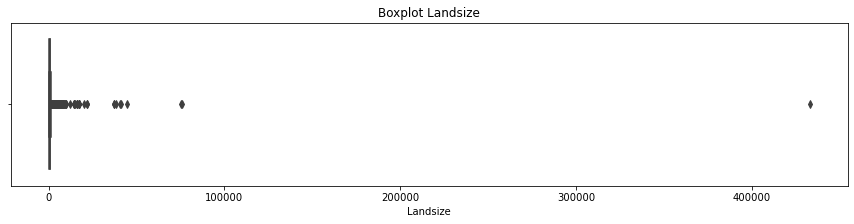

In [15]:
plt.subplots(figsize=(15,3))

sns.boxplot(df['Landsize'])
plt.title('Boxplot Landsize')
plt.savefig('Boxplot Landsize.png')
plt.show()

Boxplot mennjukan bahwa Titik-Titik yang berada diluar BOX(IQR), merupakan data outlier. Posisi boxplot pada kiri menunjukan bahwasanya sebaran data berada pada kisaran nilai mendekati ke arah kiri / bernilai kecil atau sering dimaksud *Highly Positive Skewness*. Kemudian titik outlier pada paling kanan menunjukan bahwa nilai tersebut berada pada area **Ekstrim**

Ketidak seragaman pada data membuat gambaran boxplot tidak sesuai yang diharapkan, dikarenakan perlu dilakukan adanya *Handling Outlier* pada data tersebut, sehingga gambaran data dapat menceritakan sebaran dan dispersi data.

Atau Ingin mengnormalkan sample data yang ada

<span style='color:DarkOrange'>**B. Distance**</span>

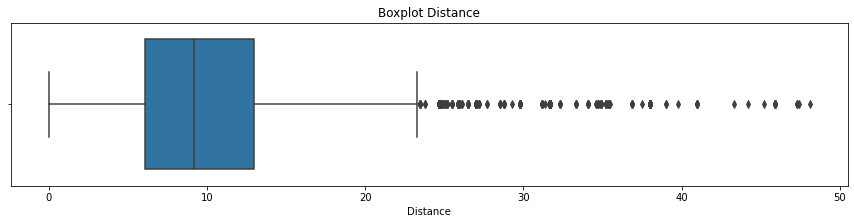

In [16]:
plt.subplots(figsize=(15,3))

sns.boxplot(df['Distance'])
plt.title('Boxplot Distance')
plt.savefig('Boxplot Distance.png')
plt.show()

In [17]:
print(batas_atas['Distance'])
print(batas_bawah['Distance'])

23.35
-4.250000000000002


Boxplot mennjukan bahwa Titik-Titik yang berada diluar BOX(IQR), merupakan data outlier. Posisi boxplot pada kiri menunjukan bahwasanya sebaran data berada pada kisaran nilai mendekati ke arah kiri / bernilai kecil atau sering dimaksud *Highly Positive Skewness*. Kemudian titik outlier pada paling kanan menunjukan bahwa nilai tersebut berada pada area **Ekstrim**

- IQR Landsize = 6.9

- Nilai Maksimum Batas atas 23.35

- Nilai Min Batas Bawah -4.25

Nilai data berada > batas atas = Outlier

Nilai data berada < batas bawah = Outlier

Dengan Range Nilai 6.9 merupakan ekspresi dari 50% data

Ketidak seragaman pada data membuat gambaran boxplot tidak sesuai yang diharapkan, dikarenakan perlu dilakukan adanya *Handling Outlier* pada data tersebut, sehingga gambaran data dapat menceritakan sebaran dan dispersi data. Atau Ingin mengnormalkan sample data yang ada

<span style='color:DarkOrange'>**C. Price**</span>

In [18]:
print(batas_atas['Price'])
print(batas_bawah['Price'])

2350000.0
-370000.0


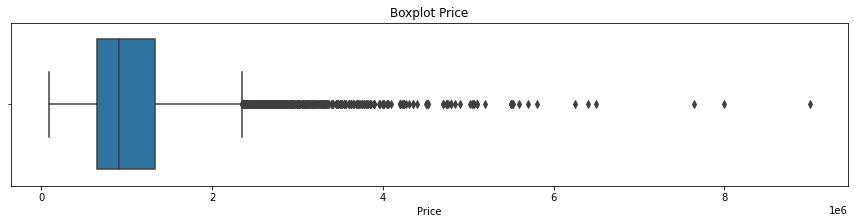

In [19]:
plt.subplots(figsize=(15,3))

sns.boxplot(df['Price'])
plt.title('Boxplot Price')
plt.savefig('Boxplot Price.png')
plt.show()

Boxplot mennjukan bahwa Titik-Titik yang berada diluar BOX(IQR), merupakan data outlier. Posisi boxplot pada kiri menunjukan bahwasanya sebaran data berada pada kisaran nilai mendekati ke arah kiri / bernilai kecil atau sering dimaksud *Highly Positive Skewness*. Kemudian titik outlier pada paling kanan menunjukan bahwa nilai tersebut berada pada area **Ekstrim**

- IQR Price = 680000

- Nilai Maksimum Batas atas 2350000

- Nilai Min Batas Bawah -370000

Nilai data berada > batas atas = Outlier
Nilai data berada < batas bawah = Outlier

Dengan Range Nilai 680000 merupakan ekspresi dari 50% data

Ketidak seragaman pada data membuat gambaran boxplot tidak sesuai yang diharapkan, dikarenakan perlu dilakukan adanya *Handling Outlier* pada data tersebut, sehingga gambaran data dapat menceritakan sebaran dan dispersi data. Atau Ingin mengnormalkan sample data yang ada

## 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column `Landsize` & `YearBuilt`. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

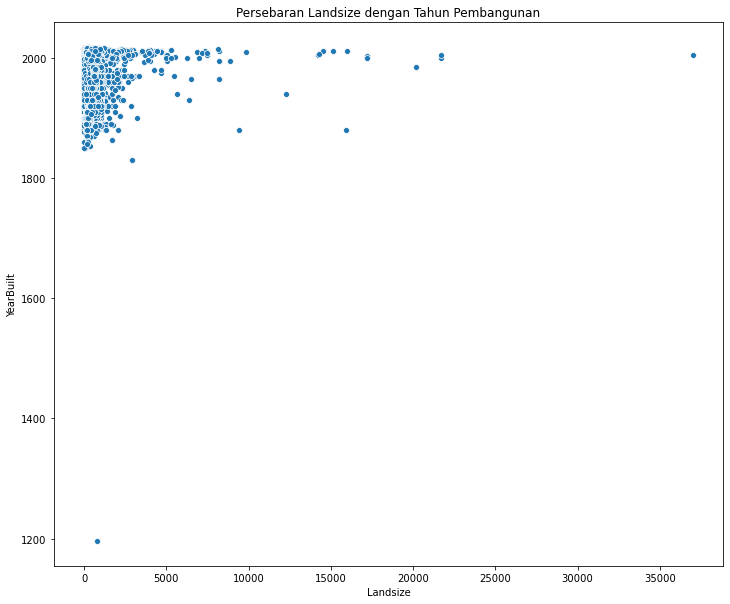

In [20]:
plt.subplots(figsize=(12,10))

sns.scatterplot(x=df['Landsize'], y=df['YearBuilt'])
plt.title('Persebaran Landsize dengan Tahun Pembangunan')
plt.savefig('Persebaran Landsize dengan Tahun Pembangunan.png')
plt.show()

Persebaran Data:

- Dapat dilihat bahwa pada scatter plot tersebut, penyebaran data Landsize yang berkisar 0-5000 metres tidak menunjukan adanya perubahan dari tahun 1800 - 2000

## 4. Tampilkan perkembangan rata-rata harga (price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

In [21]:
avgprice = df.groupby('YearBuilt')[['Price']].mean()
avgprice.reset_index(inplace=True)

In [22]:
avgprice

,YearBuilt,Price
0,1196.0,1.200000e+06
1,1830.0,8.550000e+05
2,1850.0,1.179500e+06
3,1854.0,3.310000e+06
4,1856.0,2.260000e+06
...,...,...
139,2014.0,9.219150e+05
140,2015.0,1.231485e+06
141,2016.0,1.523655e+06
142,2017.0,1.037972e+06


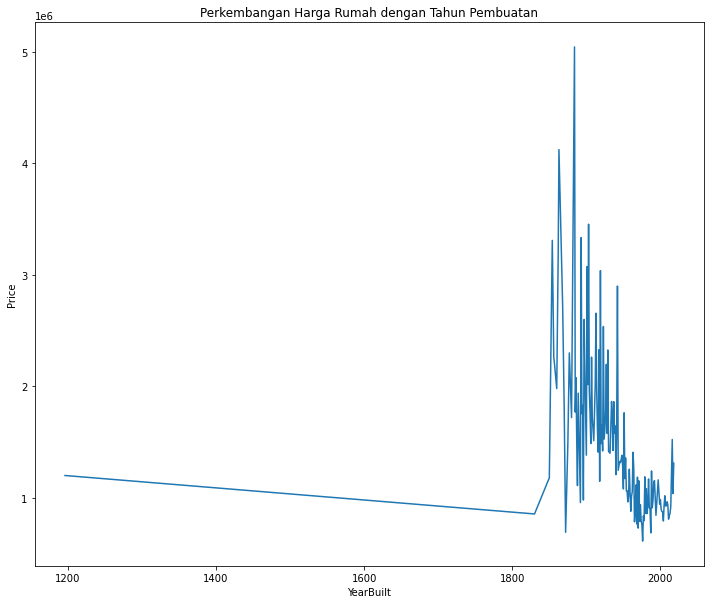

In [23]:
plt.subplots(figsize=(12,10))

sns.lineplot(x='YearBuilt', y='Price',data=avgprice)
plt.title('Perkembangan Harga Rumah dengan Tahun Pembuatan')
plt.savefig('Perkembangan Harga Rumah dengan Tahun Pembuatan.png')
plt.show()

DARI GRAFIK LINEPLOT TERSEBUT MENYATAKAN : 

- Perkembangan rata-rata rumah terhadap Tahun Pembuatan menunjukan 

     - Rumah yang di bangun pada kisaran tahun 1200 - 1800an mengalami penurunan Harga seiring bertambahnya Tahun pembuatan Properti.

     - Kisaran tahun 1800 - 1900 terjadi perubahan trend yang menunjukan bahwa harga properti tersebut mengalami kenaikan seiring dengan naiknya Tahun Pembuatan.

     - Namun trend kembali berubah seperti di awal harga rumah yang di bangun diatas tahun 1900 terus mengalami penurunan harga seiring bertambahnya tahun pembuatan
     
     - Dan Sekitar Tahun 1990an harga rumah kembali naik, dari kisaran harga skala 1 sampai ke 2

## 5. Di antara `Landsize`, `Distance`, & `Rooms`, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

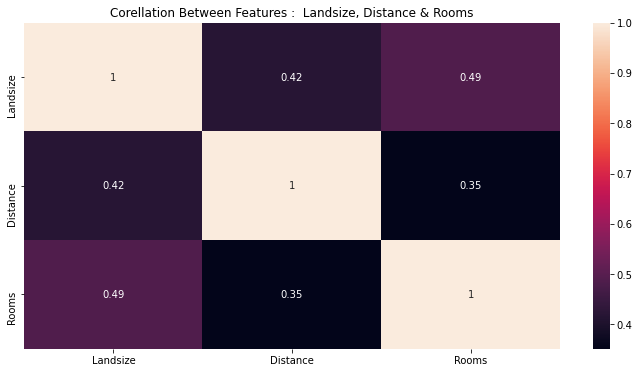

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['Landsize','Distance','Rooms']].corr('spearman'), annot = True)
plt.title('Corellation Between Features :  Landsize, Distance & Rooms')
plt.savefig('Corellation Between Features Landsize, Distance & Rooms.png')
plt.show()

Alasan penggunaan Metoda Spearman:

- Data Tidak terdistribusi normal untuk ketiga features

- Sifatnya Continous

Range korelasi dari  0 sampai 1, semakin mendekati 1 semakin kuat pula korelasinya, Artinya saat mendakati 1 fitur yang dibandingan dengan fitur lain sama-sama memiliki peranan kuat untuk mempengaruhi nilai satu sama lain. Begitu pula sebaliknya


Landsize vs Distance = 0.42

Artinya tidak begitu kuat korelasinya

In [25]:
df[['Landsize','Distance','Rooms']].corr('spearman')

,Landsize,Distance,Rooms
Landsize,1.000000,0.417379,0.485742
Distance,0.417379,1.000000,0.351416
Rooms,0.485742,0.351416,1.000000
